In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
print("\nMissing Values in each column:")
print(df.isnull().sum())


Missing Values in each column:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [6]:
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64


In [7]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [8]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


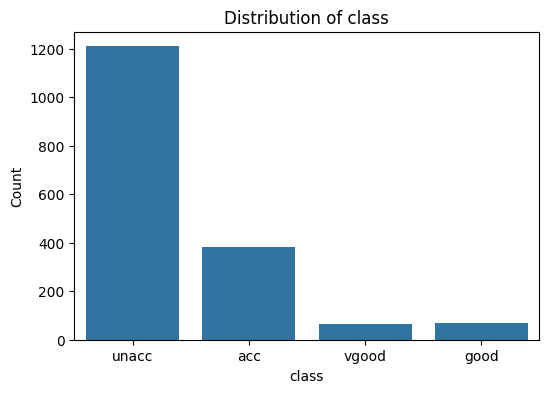

In [11]:
# Visualizing the categorical features' distributions
categorical_columns = ['class']
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

C:\Users\Tuğçe\AppData\Local\Temp\ipykernel_11608\1441988195.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='viridis')


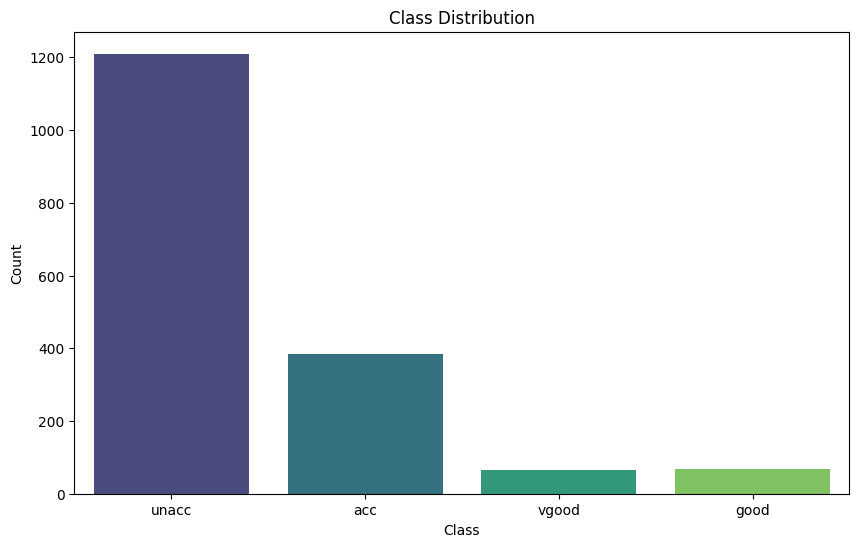

In [12]:
# class dsitributions
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

C:\Users\Tuğçe\AppData\Local\Temp\ipykernel_11608\311341829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


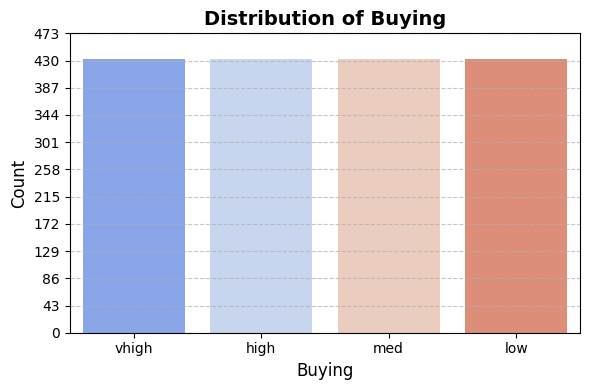

C:\Users\Tuğçe\AppData\Local\Temp\ipykernel_11608\311341829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


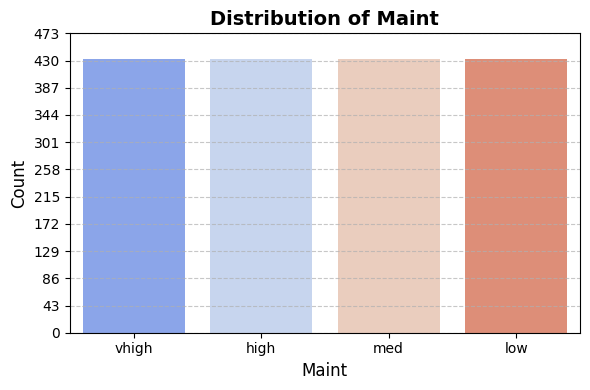

C:\Users\Tuğçe\AppData\Local\Temp\ipykernel_11608\311341829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


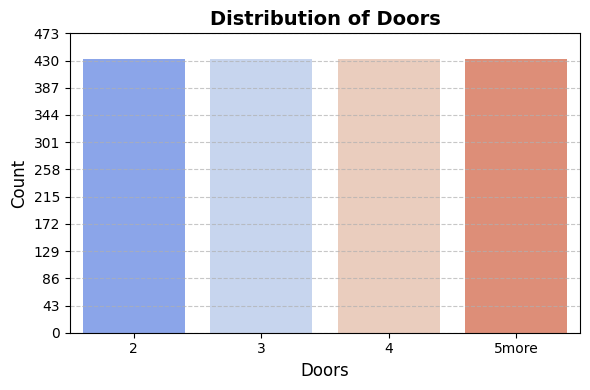

C:\Users\Tuğçe\AppData\Local\Temp\ipykernel_11608\311341829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


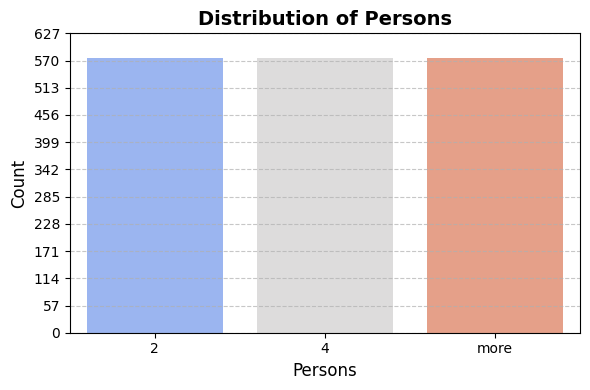

C:\Users\Tuğçe\AppData\Local\Temp\ipykernel_11608\311341829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


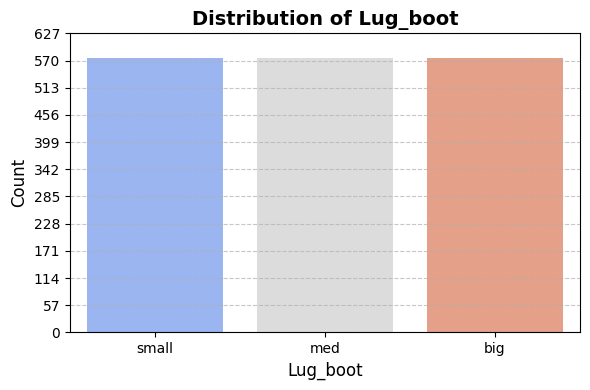

C:\Users\Tuğçe\AppData\Local\Temp\ipykernel_11608\311341829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


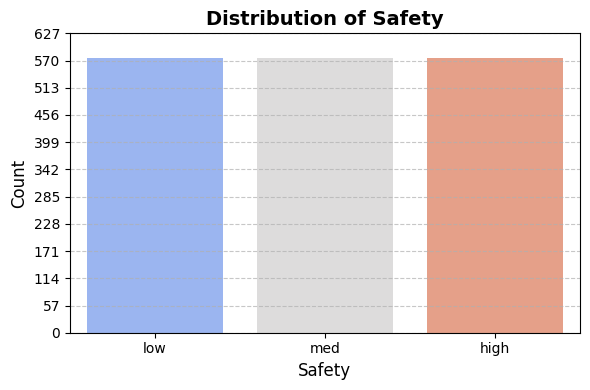

In [13]:
# Feature Distribut,on Plots
categorical_columns = df.columns[:-1]
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='coolwarm')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.title(f'Distribution of {col.capitalize()}', fontsize=14, fontweight='bold')
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    max_count = df[col].value_counts().max()
    step = max(1, max_count // 10) 
    plt.yticks(range(0, max_count + step, step))
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

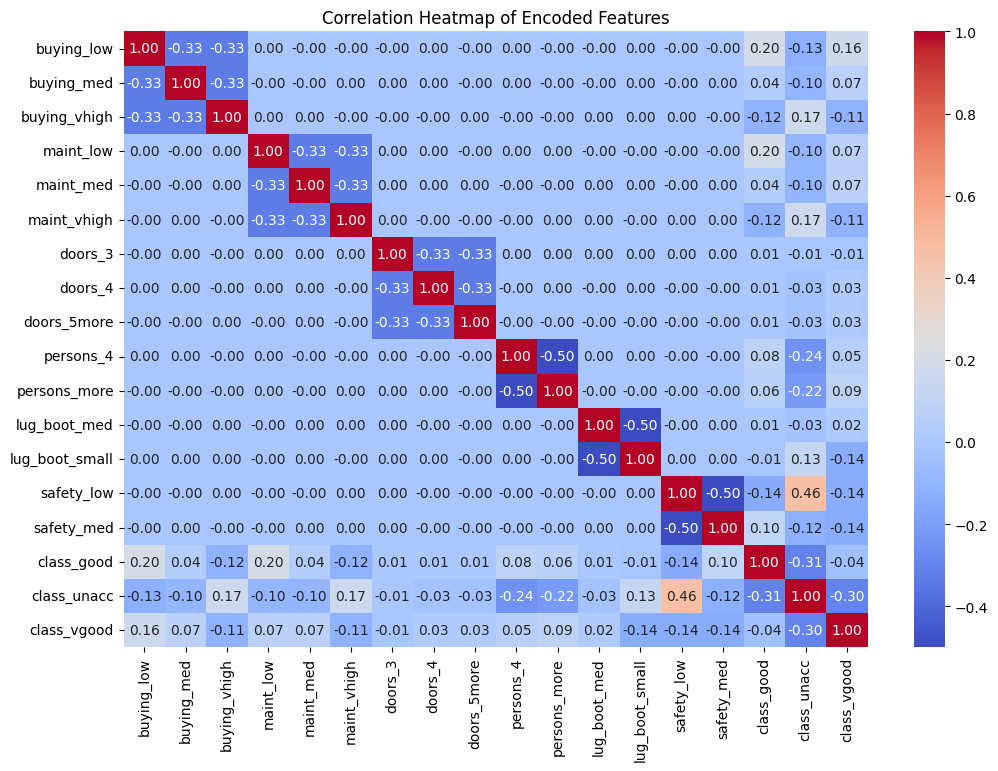

In [14]:
# Heatmap to visualize potential relationships
encoded_df = pd.get_dummies(df, drop_first=True)  # One-hot encoding for heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Encoded Features')
plt.show()

Preprocessing: One-hot encode categorical features

In [15]:
# Preprocessing: One-Hot Encoding for categorical features
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)
y_encoded = y.values.ravel()

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [17]:
svm_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

c:\Users\Tuğçe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
# SVM Results
print("\nSVM Performance Metrics:")
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {svm_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Performance Metrics:
Accuracy: 0.9306

Classification Report:
              precision    recall  f1-score   support

         acc       0.92      0.80      0.85        83
        good       0.50      0.91      0.65        11
       unacc       0.97      0.97      0.97       235
       vgood       0.94      1.00      0.97        17

    accuracy                           0.93       346
   macro avg       0.83      0.92      0.86       346
weighted avg       0.94      0.93      0.93       346



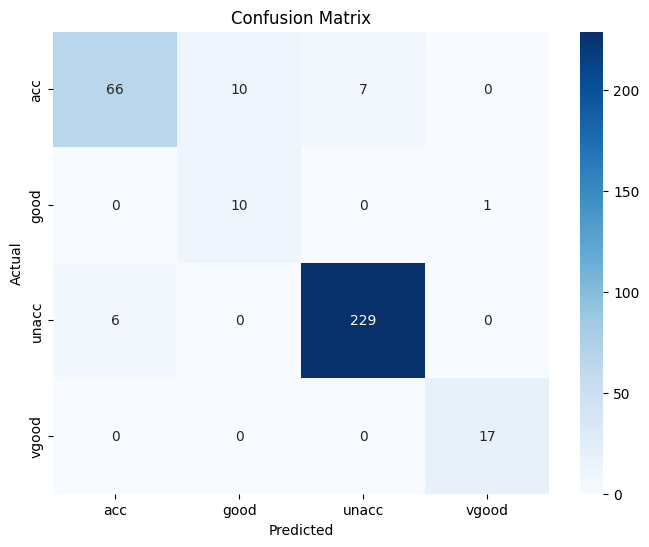

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

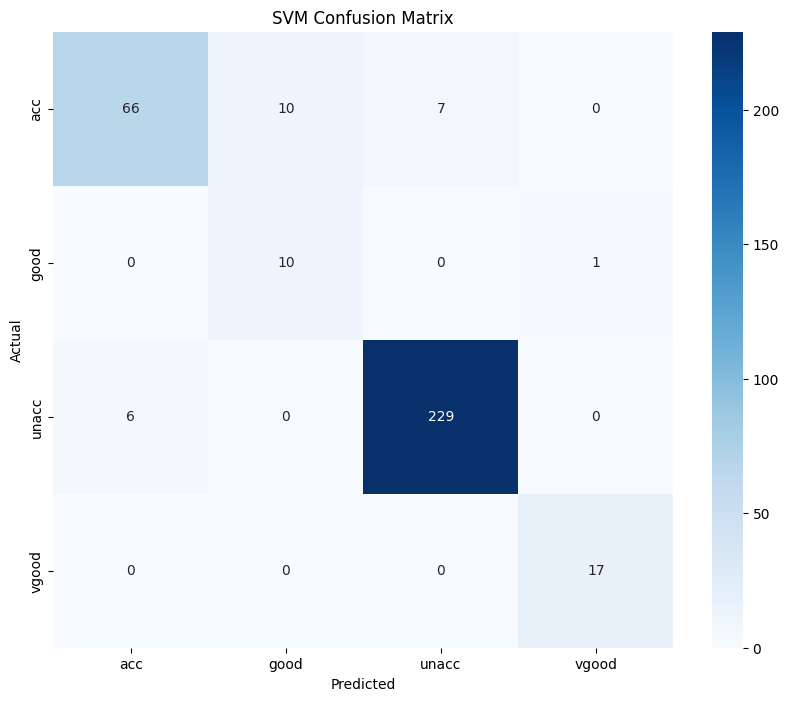

In [20]:
# SVM Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

c:\Users\Tuğçe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [22]:
# Random Forest Results
print("\nRandom Forest Performance Metrics:")
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance Metrics:
Accuracy: 0.9538

Classification Report:
              precision    recall  f1-score   support

         acc       0.97      0.84      0.90        83
        good       0.59      0.91      0.71        11
       unacc       0.98      1.00      0.99       235
       vgood       0.83      0.88      0.86        17

    accuracy                           0.95       346
   macro avg       0.84      0.91      0.87       346
weighted avg       0.96      0.95      0.95       346



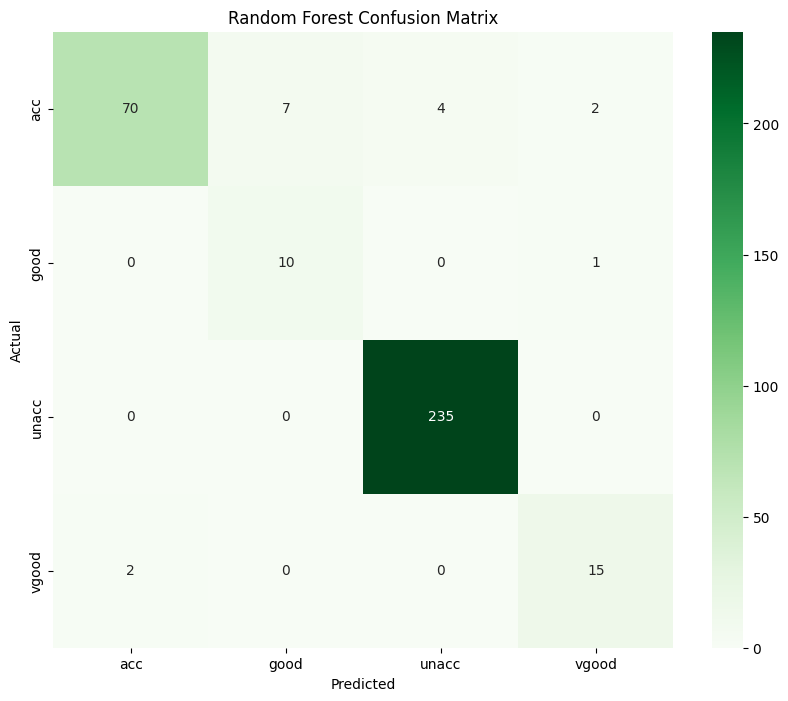

In [23]:
# Random Forest Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\Tuğçe\AppData\Local\Temp\ipykernel_11608\1371953352.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance, palette='Spectral')


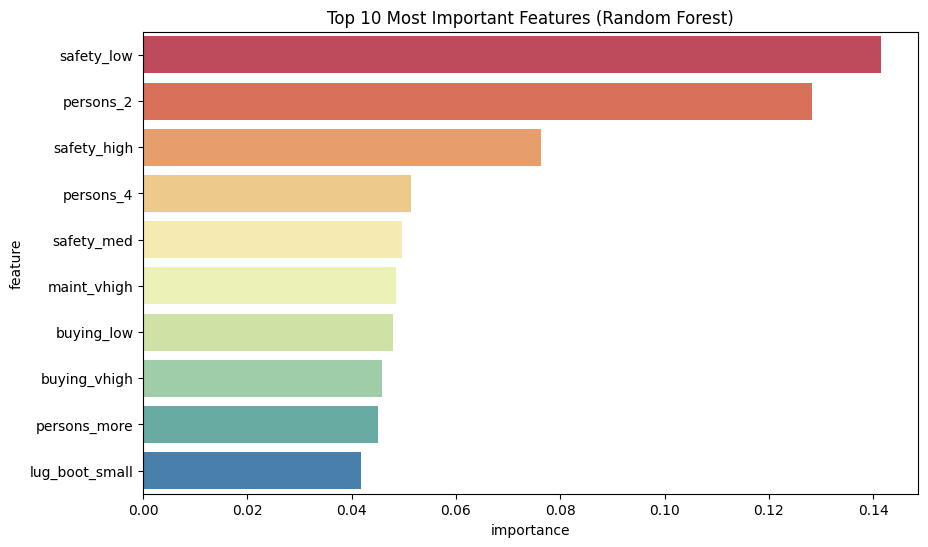

In [24]:
# Feature Importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': encoder.get_feature_names_out(),
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='Spectral')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.show()

Logistic Regression

In [25]:
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

c:\Users\Tuğçe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# Logistic Regression Results
print("\nLogistic Regression Performance Metrics:")
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {lr_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Performance Metrics:
Accuracy: 0.9162

Classification Report:
              precision    recall  f1-score   support

         acc       0.84      0.82      0.83        83
        good       0.50      0.55      0.52        11
       unacc       0.96      0.97      0.97       235
       vgood       0.94      0.88      0.91        17

    accuracy                           0.92       346
   macro avg       0.81      0.80      0.81       346
weighted avg       0.92      0.92      0.92       346



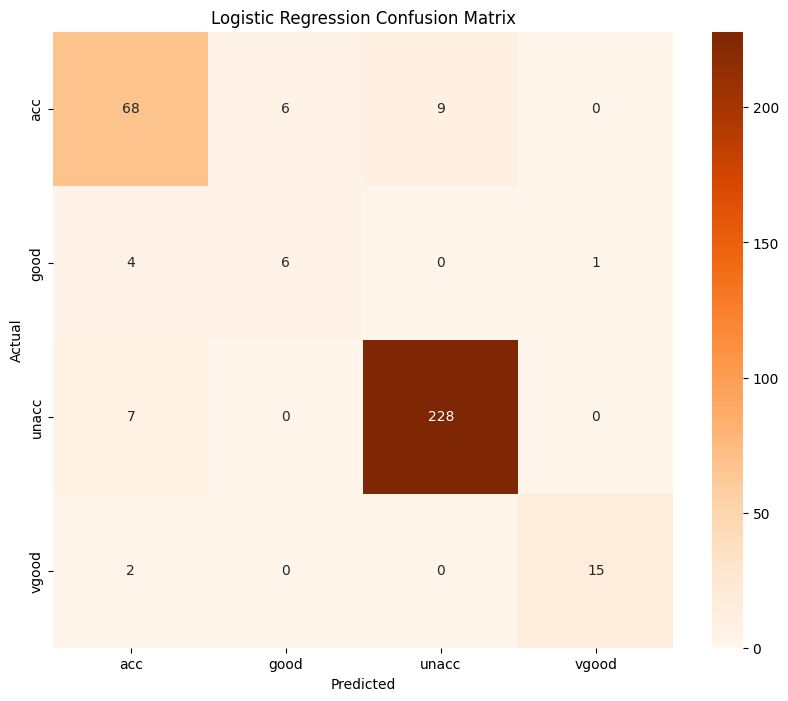

In [27]:
# Logistic Regression Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_lr),
            annot=True, fmt='d', cmap='Oranges',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Comparison

In [28]:
models_comparison = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'Logistic Regression'],
    'Accuracy': [svm_accuracy, rf_accuracy, lr_accuracy]
})

In [29]:
print("\nAccuracy Comparison:")
print(models_comparison.to_string(index=False))


Accuracy Comparison:
              Model  Accuracy
                SVM  0.930636
      Random Forest  0.953757
Logistic Regression  0.916185


C:\Users\Tuğçe\AppData\Local\Temp\ipykernel_11608\3656683653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=models_comparison, palette='viridis')


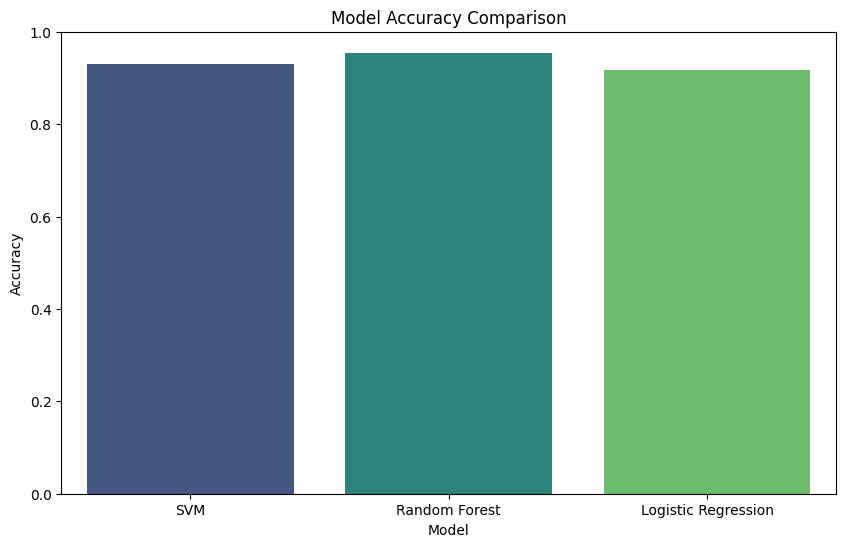

In [30]:
# Visualization of model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=models_comparison, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

In [31]:
# Additional comparison metrics
print("\nDetailed Model Comparison:")
for model_name, y_pred in [("SVM", y_pred_svm), 
                          ("Random Forest", y_pred_rf), 
                          ("Logistic Regression", y_pred_lr)]:
    print(f"\n{model_name}:")
    print(classification_report(y_test, y_pred))


Detailed Model Comparison:

SVM:
              precision    recall  f1-score   support

         acc       0.92      0.80      0.85        83
        good       0.50      0.91      0.65        11
       unacc       0.97      0.97      0.97       235
       vgood       0.94      1.00      0.97        17

    accuracy                           0.93       346
   macro avg       0.83      0.92      0.86       346
weighted avg       0.94      0.93      0.93       346


Random Forest:
              precision    recall  f1-score   support

         acc       0.97      0.84      0.90        83
        good       0.59      0.91      0.71        11
       unacc       0.98      1.00      0.99       235
       vgood       0.83      0.88      0.86        17

    accuracy                           0.95       346
   macro avg       0.84      0.91      0.87       346
weighted avg       0.96      0.95      0.95       346


Logistic Regression:
              precision    recall  f1-score   support

   